# Exercice sur les métriques

Pour l'exercice on va réutiliser le jeu de données sur le diabète.

Rappel concernant la target "diabete" : 
- 0 représente une personne n'ayant pas le diabète
- 1 représente une personne ayant le diabète

Dans le bout de code ci-dessous, on importe deux modèles différents que l'on entraîne sur le dataset.
Les différents imports nécessaires pour l'exercice sont également déjà fait. Ceux dont vous aurez besoin sont importés de `numpy`, `sklearn.metrics` et `sklearn.model_selection`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, average_precision_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict

data = pd.read_csv("dataset/pima-indians-diabetes.data.csv", header=None, names=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabete_pedigree", "age", "diabete"])

columns = ["blood_pressure", "skin_thickness", "insulin", "bmi", "diabete_pedigree", "age"]
imputer = KNNImputer(missing_values=0, n_neighbors=5)
columns_imputed = imputer.fit_transform(data[columns])
data[columns] = columns_imputed

X = data.drop("diabete", axis=1)
y = data.diabete

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.80, random_state=42, stratify=y)

tr_clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), DecisionTreeClassifier(random_state=42))
tr_clf.fit(X_train, y_train)

rf_clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), RandomForestClassifier(random_state=42))
rf_clf.fit(X_train, y_train)

/tmp/ipykernel_2691/1141542234.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## Exercice :

A partir de l'étape 2, les différentes tâches devront être effectuées pour les deux modèles `sgd_clf` et `rf_clf`.

#### 1. Analyser la répartition de la target

In [2]:
# Utiliser le dataframe data ou y

display(data["diabete"].value_counts())
display(data["diabete"].value_counts(normalize=True))

diabete
0    500
1    268
Name: count, dtype: int64

diabete
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Qu'est ce qu'on peut dire sur la répartition ?

On remarque que les classes sont déséquilibrées : 
- 65.1% des individus n'ont pas de diabète
- 34.9% des individus ont le diabète

### 2. Réaliser les prédictions sur le training set

In [3]:
y_train_pred_tr = cross_val_predict(tr_clf, X_train, y_train)
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train)

 ### 3. Réaliser la matrice de confusion

Matrice de confusion pour le modèle Decision Tree


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,302,98
Actual Diabete,94,120


Matrice de confusion pour le modèle Random Forest


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,349,51
Actual Diabete,87,127


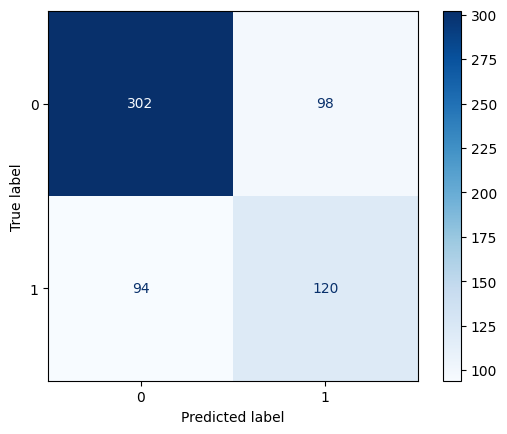

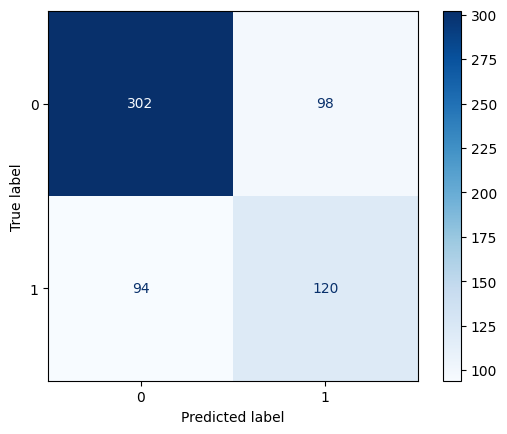

In [4]:
# Utiliser les prédictions réalisées juste avant
# Pour une meilleur visualisation, représenter la matrice avec un dataframe ou la fonction display pour la matrice
# Pour le dataframe ajouter le nom aux index et colonnes peut aider à une meilleur compréhension
# Pour la fonction display ajouter les labels

cm_tr = confusion_matrix(y_train, y_train_pred_tr)
conf_matrix_tr = pd.DataFrame(cm_tr, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle Decision Tree")
display(conf_matrix_tr)

graph_cm_tr = ConfusionMatrixDisplay(cm_tr, display_labels=tr_clf.classes_)
graph_cm_tr.plot(cmap="Blues")

cm_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_rf = pd.DataFrame(cm_rf, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_rf)

graph_cm_rf = ConfusionMatrixDisplay(cm_tr, display_labels=rf_clf.classes_)
graph_cm_rf.plot(cmap="Blues")

Que remarquez-vous sur ces matrices ? Est-ce qu'un modèle fait un type d'erreur particulier ? 

On remarque que le modèle SGD fait plus d'erreurs de prédictions pour les faux positifs que le modèle Random Forest. Les deux modèles ont également du mal à correctement prédire les personnes ayant le diabète.

### 4. Calculer les différentes métriques

In [5]:
# Calculer les métriques une par une ou utiliser la fonction pour calculer l'ensemble des métriques
# Rappel des métriques : accuracy, recall, precision, F1 score

print("Métrique pour le modèle Decision Tree")
print("Score d'accuracy", accuracy_score(y_train, y_train_pred_tr))
print("Score du recall : ", recall_score(y_train, y_train_pred_tr))
print("Score de la precision : ", precision_score(y_train, y_train_pred_tr))
print("Score F1 : ", f1_score(y_train, y_train_pred_tr))
print("")
print(classification_report(y_train, y_train_pred_tr))

print("")

print("Métrique pour le modèle Random Forest")
print("Score d'accuracy", accuracy_score(y_train, y_train_pred_rf))
print("Score du recall : ", recall_score(y_train, y_train_pred_rf))
print("Score de la precision : ", precision_score(y_train, y_train_pred_rf))
print("Score F1 : ", f1_score(y_train, y_train_pred_rf))
print("")
print(classification_report(y_train, y_train_pred_rf))


Métrique pour le modèle Decision Tree
Score d'accuracy 0.6872964169381107
Score du recall :  0.5607476635514018
Score de la precision :  0.5504587155963303
Score F1 :  0.5555555555555556

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       400
           1       0.55      0.56      0.56       214

    accuracy                           0.69       614
   macro avg       0.66      0.66      0.66       614
weighted avg       0.69      0.69      0.69       614


Métrique pour le modèle Random Forest
Score d'accuracy 0.7752442996742671
Score du recall :  0.5934579439252337
Score de la precision :  0.7134831460674157
Score F1 :  0.6479591836734694

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       400
           1       0.71      0.59      0.65       214

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77 

Qu'est ce qu'on peut dire sur ces différentes métriques ? Est-ce qu'un modèle est meilleur que l'autre ? Comment interprétez-vous la différence de score de precision entre les deux modèles ? 

Les scores du recall pour les deux modèles confirment que les modèles ont du mal à indentifier une personne diabètique. Le meilleur étant le modèle Random Forest avec un recall de 0.59. C'est aussi le modèle Random Forest qui a la meilleur precision avec 71%. Il y a moins de chances qu'il prédit une personne non diabètique comme ayant le diabète.

### 5. Calculer les probabilités

In [6]:
# Utiliser la même fonction que pour les prédictions en ajoutant un paramètre afin d'obtenir les probabilités
# A partir de ces probabilités récupérer uniquement celles pour la classe positive

y_probas_tr = cross_val_predict(tr_clf, X_train, y_train, method="predict_proba")
y_scores_tr = y_probas_tr[:, 1]

y_probas_rf = cross_val_predict(rf_clf, X_train, y_train, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

### 6. Calculer les combinaisons de precision et recall en fonction des probabilités

In [7]:
# Utiliser les probabilités calculés précedemment

precisions_tr, recalls_tr, thresholds_tr = precision_recall_curve(y_train, y_scores_tr)

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf)

### 7. Représenter graphiquement l'évolution de la precision et du recall en fonction du seuil

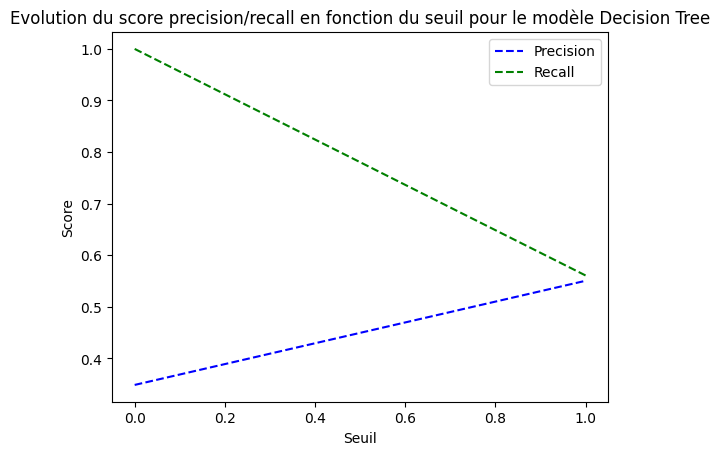

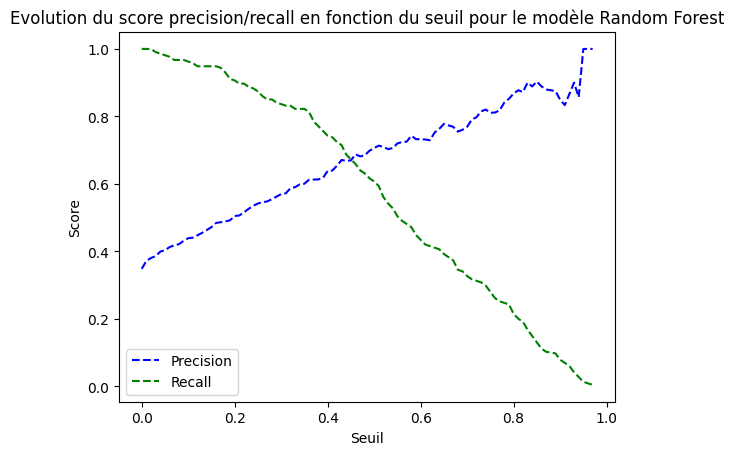

In [8]:
# Utiliser les thresholds, precisions et recall calculés
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

plt.plot(thresholds_tr, precisions_tr[:-1], "b--", label="Precision")
plt.plot(thresholds_tr, recalls_tr[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil pour le modèle Decision Tree")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.show()

plt.plot(thresholds_rf, precisions_rf[:-1], "b--", label="Precision")
plt.plot(thresholds_rf, recalls_rf[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil pour le modèle Random Forest")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()

plt.show()

Dans le cas du diagnostic du diabète, est-ce qu'on préfére maximiser le recall ou la precision ?

Dans le cas du diagnostic d'une maladie on ne souhaite surtout pas que notre modèle prédit une personne malade comme étant saine. On veut plutôt que notre modèle détecte le plus de malade possible, quitte à augmenter le nombre de personnes en bonne santé diagnostiquées comme étant malades.

On préfé donc maximiser le recall, quitte à avoir une precision plus faible.

### 8. Représenter graphiquement l'évolution de la precision en fonction du recall et calculer son AUC

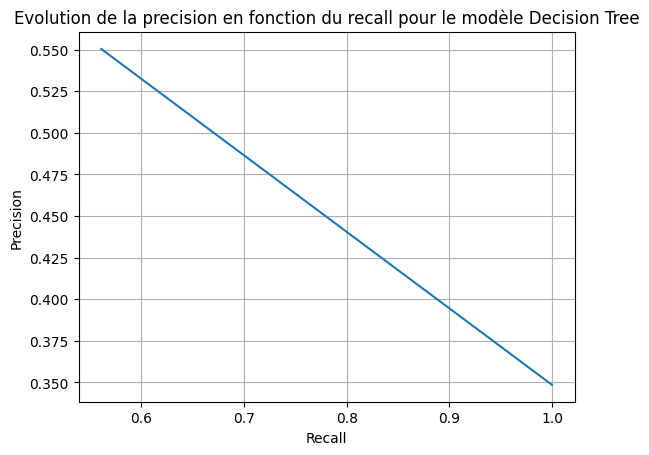

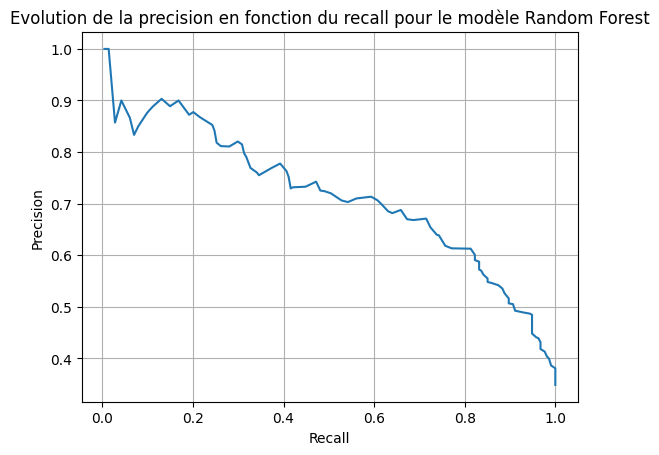

AUC courbe PR pour modèle Decision Tree 0.46176290119286445
AUC courbe PR pour modèle Random Forest 0.5651160519653943


In [9]:
# Utiliser les precisions et recalls calculés
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

plt.plot(recalls_tr[:-1], precisions_tr[:-1])
plt.title("Evolution de la precision en fonction du recall pour le modèle Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

plt.plot(recalls_rf[:-1], precisions_rf[:-1])
plt.title("Evolution de la precision en fonction du recall pour le modèle Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

print("AUC courbe PR pour modèle Decision Tree", average_precision_score(y_train, y_train_pred_tr))
print("AUC courbe PR pour modèle Random Forest", average_precision_score(y_train, y_train_pred_rf))

D'après l'AUC pour la courbe precision/recall, quel modèle est le meilleur ? 

C'est le modèle Random Forest qui a un meilleur AUC pour la courbe precision/recall.

### 9. Calculer le seuil pour obtenir un score de recall de 0.9

In [10]:
# Utiliser les thresholds calculés précedemment
# Obtenir l'index pour un recall de 0.9 puis récupérer le seuil à partir de cette index

treshold_90_recall_tr = thresholds_tr[np.argmax(recalls_tr <= 0.905)]
print(treshold_90_recall_tr)

treshold_90_recall_rf = thresholds_rf[np.argmax(recalls_rf <= 0.905)]
print(treshold_90_recall_rf)

1.0
0.21


### 10. A partir des seuils calculés, créer de nouvelles prédictions

In [11]:
# Utiliser les scores obtenus à l'étape 5 et les seuils calculés

y_train_pred_90_tr = (y_scores_tr >= treshold_90_recall_tr)

y_train_pred_90_rf = (y_scores_rf >= treshold_90_recall_rf)

### 11. Afficher les métriques avec classification report pour ces nouvelles prédictions

In [12]:
print("Modèle Decision Tree")
print(classification_report(y_train, y_train_pred_90_tr))

print("Modèle Random Forest")
print(classification_report(y_train, y_train_pred_90_rf))

Modèle Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       400
           1       0.55      0.56      0.56       214

    accuracy                           0.69       614
   macro avg       0.66      0.66      0.66       614
weighted avg       0.69      0.69      0.69       614

Modèle Random Forest
              precision    recall  f1-score   support

           0       0.91      0.53      0.67       400
           1       0.51      0.90      0.65       214

    accuracy                           0.66       614
   macro avg       0.71      0.71      0.66       614
weighted avg       0.77      0.66      0.66       614



Qu'est ce que vous constatez concernant le recall pour le modèle Random Forest ? Quel est l'impact d'avoir changer le seuil pour augmenter le recall ?

Concernant le modèle Random Forest, le recall est bien à 0,9. On constate en revanche que la precision pour ce modèle à fortement diminuer, passant de 0,71 à 0,51.

### 12. Créer une matrice de confusion en utilisant ces nouvelles prédictions

In [13]:
cm_tr = confusion_matrix(y_train, y_train_pred_90_tr)
conf_matrix_sgd = pd.DataFrame(cm_tr, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle Decision Tree")
display(conf_matrix_sgd)

cm_rf = confusion_matrix(y_train, y_train_pred_90_rf)
conf_matrix_rf = pd.DataFrame(cm_rf, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_rf)

Matrice de confusion pour le modèle Decision Tree


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,302,98
Actual Diabete,94,120


Matrice de confusion pour le modèle Random Forest


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,213,187
Actual Diabete,22,192


Qu'est ce qu'on peut dire sur la matrice de confusion pour le modèle Random Forest ? 

On se rend compte que le modèle est maintenant meilleur pour identifier les personnes diabètiques. Par contre il prédit également beaucoup plus de personnes non diabètique comme étant diabètique.

### 13. Réaliser la courbe ROC

In [14]:
# Utiliser cette fonction pour créer le graphique de la courbe ROC

def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

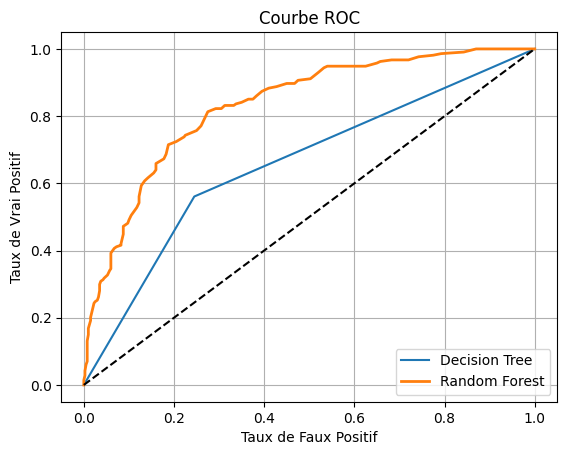

In [15]:
# Utiliser les scores obtenus à l'étape 5
# Représenter les deux modèles sur le même graphique

fpr_tr, tpr_tr, tresholds_tr = roc_curve(y_train, y_scores_tr)

fpr_rf, tpr_rf, tresholds_rf = roc_curve(y_train, y_scores_rf)

plt.plot(fpr_tr, tpr_tr, label="Decision Tree")
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Comment analysez-vous ce graphique ?

Le modèle Random Forest est globalement plus performant que le modèle Decision Tree.

### 14. Calculer l'AUC

In [16]:
# Utiliser les scores obtenus à l'étape 5

print("AUC modèle Decision Tree", roc_auc_score(y_train, y_scores_tr))
print("AUC modèle Random Forest", roc_auc_score(y_train, y_scores_rf))

AUC modèle Decision Tree 0.6578738317757009
AUC modèle Random Forest 0.831875


Qu'est ce qu'on peut dire sur ces scores AUC ?

L'AUC du modèle Random Forest est meilleur que celle du modèle Decision Tree.